# Imports

In [1]:
from gluonts.evaluation import metrics
import numpy as np
from gluonts.ev.metrics import MeanWeightedSumQuantileLoss
import matplotlib.pyplot as plt

# Calculations

## Quantile Loss

Create some dummy data:

In [2]:
prediction = np.array([1, 2, 3, 4, 5])
actual = np.array([10, 22, 30, 40, 51])
quantile = 0.1

Calculate using lib:

In [3]:
metrics = metrics.quantile_loss(actual,prediction, quantile)

Manual calculation

In [4]:
# Step 2: Calculate the Quantile Loss (QL)
def quantile_loss(alpha, q, x):
    return np.where(x > q, alpha * (x - q), (1 - alpha) * (q - x))


quantile_loss(quantile, prediction, actual)


array([0.9, 2. , 2.7, 3.6, 4.6])

## MeanWeightedSumQuantileLoss

dummy data:

In [5]:

data = {
        "label": np.array([3, 5, 7]),
        "0.5": np.array([3.0, 5.0, 7.0]),
        "0.1":  np.array([2.5, 4.5, 6.5]),
        "0.9": np.array([3.5, 5.5, 7.5]),
    }

Auto calculation:

In [6]:
metric = MeanWeightedSumQuantileLoss([0.1, 0.5, 0.9])
evaluator = metric(axis=None)
evaluator.update(data)
evaluator.get()

np.float64(0.013333333333333334)

Manual calculation:

In [7]:
quantiles = [0.1, 0.5, 0.9]
quantile_losses = {}

# calculate quantile loss at each time step for each quantile
for quantile in quantiles:
    ql = quantile_loss(quantile, data[str(quantile)], data["label"])
    quantile_losses[str(quantile)] = ql
    print(f"Quantile Loss for {quantile}: {ql}")


# aggregate each quantile over time steps with a weight
aggregated_qls = {}
weight = 2/np.abs(data["label"]).sum()
for quantile in quantiles:
    ql = quantile_losses[str(quantile)]
    aggregated_ql = np.sum(ql) * weight
    aggregated_qls[str(quantile)] = aggregated_ql
    print(f"Aggregated Quantile Loss for {quantile}: {aggregated_ql}")

# now just do a simple average
simple_average = np.mean(list(aggregated_qls.values()))
print(f"Simple Average: {simple_average}")


Quantile Loss for 0.1: [0.05 0.05 0.05]
Quantile Loss for 0.5: [0. 0. 0.]
Quantile Loss for 0.9: [0.05 0.05 0.05]
Aggregated Quantile Loss for 0.1: 0.020000000000000004
Aggregated Quantile Loss for 0.5: 0.0
Aggregated Quantile Loss for 0.9: 0.019999999999999997
Simple Average: 0.013333333333333334


# Visuals 

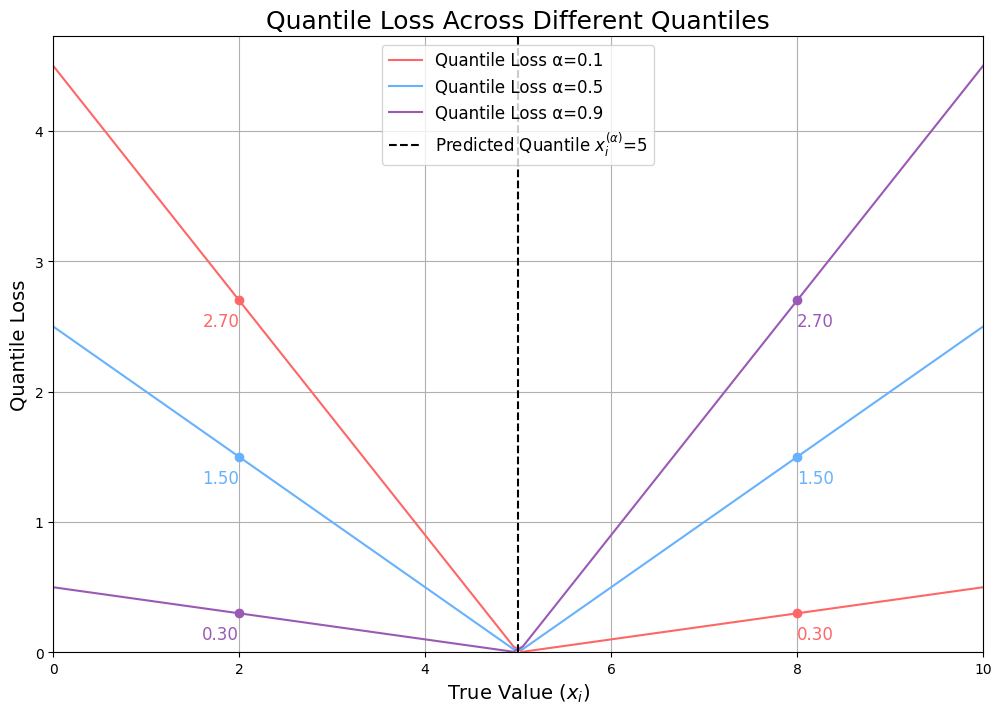

In [8]:


# Function to calculate Quantile Loss
def quantile_loss_manual(alpha, q, x):
    return np.where(x > q, alpha * (x - q), (1 - alpha) * (q - x))

# Generate a range of true values
x = np.linspace(0, 10, 100)

# Set a fixed quantile prediction
q_pred = 5

# Calculate Quantile Loss for different quantiles
alphas = [0.1, 0.5, 0.9]
colors = ['#FF6666', '#66B2FF', '#9B59B6']  # Using the deep purple

plt.figure(figsize=(12, 8))

for alpha, color in zip(alphas, colors):
    ql = quantile_loss_manual(alpha, q_pred, x)
    plt.plot(x, ql, color=color, label=f'Quantile Loss α={alpha}')
    
    # Add markers at x = 2 and x = 8
    ql_2 = quantile_loss_manual(alpha, q_pred, 2)
    ql_8 = quantile_loss_manual(alpha, q_pred, 8)
    plt.plot(2, ql_2, 'o', color=color)  # Simple dot marker
    plt.plot(8, ql_8, 'o', color=color)  # Simple dot marker

# Manually add labels for clarity
ql_2_01 = quantile_loss_manual(0.1, q_pred, 2)
ql_8_01 = quantile_loss_manual(0.1, q_pred, 8)
ql_2_05 = quantile_loss_manual(0.5, q_pred, 2)
ql_8_05 = quantile_loss_manual(0.5, q_pred, 8)
ql_2_09 = quantile_loss_manual(0.9, q_pred, 2)
ql_8_09 = quantile_loss_manual(0.9, q_pred, 8)

# Left side labels (x = 2)
plt.text(2, ql_2_01 - 0.2, f"{ql_2_01:.2f}", fontsize=12, color='#FF6666', ha='right')
plt.text(2, ql_2_05 - 0.2, f"{ql_2_05:.2f}", fontsize=12, color='#66B2FF', ha='right')
plt.text(2, ql_2_09 - 0.2, f"{ql_2_09:.2f}", fontsize=12, color='#9B59B6', ha='right')

# Right side labels (x = 8)
plt.text(8, ql_8_01 - 0.2, f"{ql_8_01:.2f}", fontsize=12, color='#FF6666', ha='left')
plt.text(8, ql_8_05 - 0.2, f"{ql_8_05:.2f}", fontsize=12, color='#66B2FF', ha='left')
plt.text(8, ql_8_09 - 0.2, f"{ql_8_09:.2f}", fontsize=12, color='#9B59B6', ha='left')

# Highlight the predicted quantile
plt.axvline(q_pred, color='black', linestyle='--', label=f'Predicted Quantile $x_i^{{(α)}}$={q_pred}')

# Beautify the plot
plt.title('Quantile Loss Across Different Quantiles', fontsize=18)
plt.xlabel('True Value ($x_i$)', fontsize=14)
plt.ylabel('Quantile Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0, 10)  # Set the x-axis limits
plt.ylim(0, None)  # Set the y-axis lower limit to 0
plt.show()


# Interpret Metric

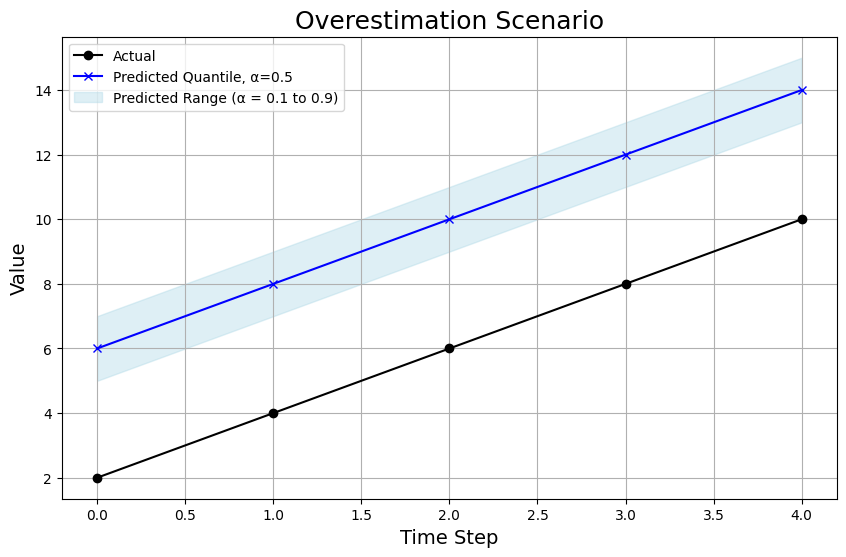

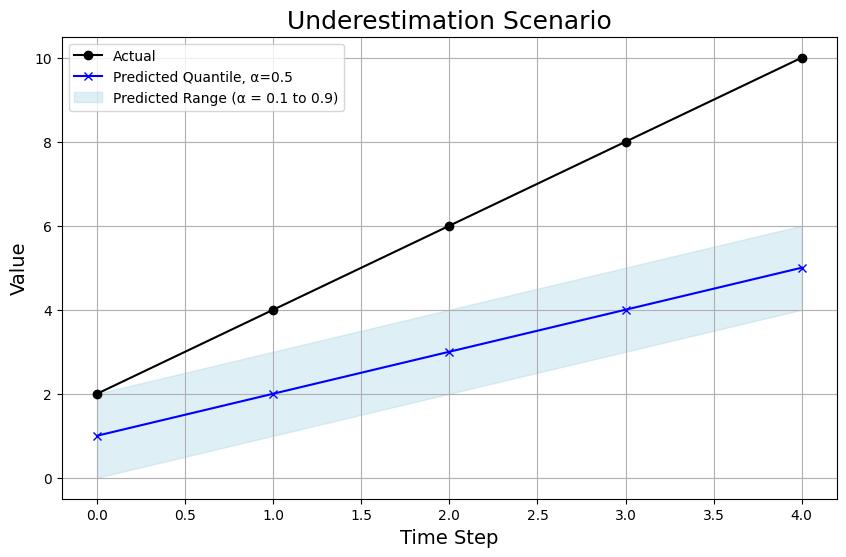

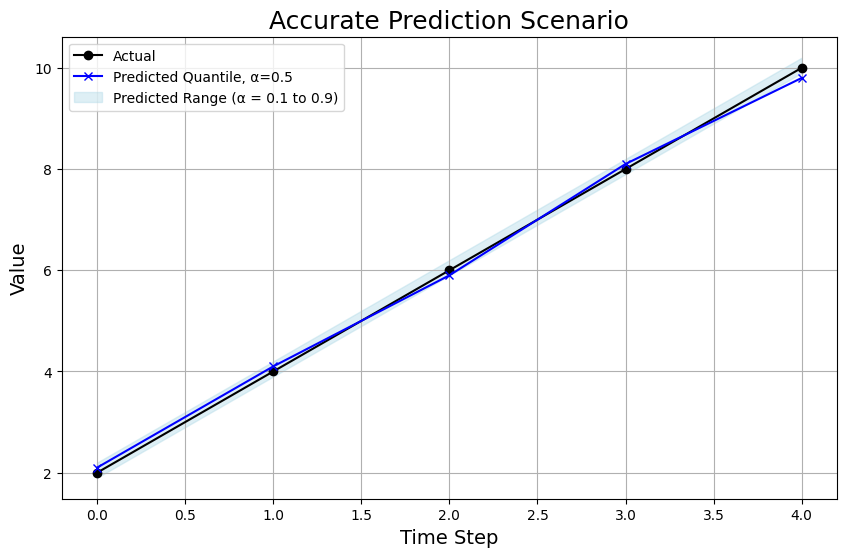

WQL for Overestimation: 0.58
WQL for Underestimation: 0.41
WQL for Accurate Prediction: 0.01


In [9]:




# Actual values
actual_values = np.array([2, 4, 6, 8, 10])

# Overestimation scenario
overestimation = {
    0.1: np.array([5, 7, 9, 11, 13]),
    0.5: np.array([6, 8, 10, 12, 14]),
    0.9: np.array([7, 9, 11, 13, 15])
}

# Underestimation scenario
underestimation = {
    0.1: np.array([0, 1, 2, 3, 4]),
    0.5: np.array([1, 2, 3, 4, 5]),
    0.9: np.array([2, 3, 4, 5, 6])
}

# Accurate prediction scenario with tighter range and jitter
accurate_prediction = {
    0.1: np.array([1.9, 3.9, 5.9, 7.9, 9.9]),
    0.5: np.array([2.1, 4.1, 5.9, 8.1, 9.8]),  # Added some jitter
    0.9: np.array([2.2, 4.2, 6.2, 8.2, 10.2])
}

# Function to plot predictions
def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual', color='black', marker='o')
    plt.plot(predictions[0.5], label='Predicted Quantile, α=0.5', color='blue', linestyle='-', marker='x')
    
    # Shaded area between 0.1 and 0.9 quantiles
    plt.fill_between(range(len(actual)), predictions[0.1], predictions[0.9], color='lightblue', alpha=0.4, label='Predicted Range (α = 0.1 to 0.9)')
    
    plt.title(title, fontsize=18)
    plt.xlabel('Time Step', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot overestimation
plot_predictions(actual_values, overestimation, 'Overestimation Scenario')

# Plot underestimation
plot_predictions(actual_values, underestimation, 'Underestimation Scenario')

# Plot accurate prediction
plot_predictions(actual_values, accurate_prediction, 'Accurate Prediction Scenario')

# Function to calculate WQL
def calculate_wql(actual, predictions):
    data = {
        "label": actual,
        "0.1": predictions[0.1],
        "0.5": predictions[0.5],
        "0.9": predictions[0.9],
    }
    metric = MeanWeightedSumQuantileLoss([0.1, 0.5, 0.9])
    evaluator = metric(axis=None)
    evaluator.update(data)
    return evaluator.get()

# Calculate and print WQL for each scenario
wql_over = calculate_wql(actual_values, overestimation)
wql_under = calculate_wql(actual_values, underestimation)
wql_accurate = calculate_wql(actual_values, accurate_prediction)

print(f'WQL for Overestimation: {wql_over:.2f}')
print(f'WQL for Underestimation: {wql_under:.2f}')
print(f'WQL for Accurate Prediction: {wql_accurate:.2f}')
